# Alexoin Centene Pair
### Entry Threshold:	2.00 | Exit Threshold:	0.00 | Max Duration:	15	
### MA Period:	60 | MA Type:	SMA	StdDev | Period:	30 | Total ROI:	1471.94 % | CAGR:	173.06 %	 | Max. DD:	84.89 %
### Sharpe Ratio:	2.394

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl
from statsmodels.tsa.stattools import adfuller

In [2]:
start= datetime.datetime(2018, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 9, 30)

In [3]:
ticker_1 = "ALXN"
ticker_2 = "CNC"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,113.949997,112.220001,113.949997,113.559998,1373400,113.559998
2019-11-27,114.980003,113.250000,114.190002,114.650002,1049300,114.650002
2019-11-29,115.000000,113.379997,114.129997,113.940002,609600,113.940002
2019-12-02,114.959999,112.010002,113.199997,112.910004,1560300,112.910004
2019-12-03,114.129997,111.290001,112.000000,114.050003,1679703,114.050003


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,61.080002,59.910000,60.730000,60.020000,3563400.0,60.020000
2019-11-27,60.759998,59.610001,60.110001,60.439999,2983300.0,60.439999
2019-11-29,60.639999,59.720001,60.400002,60.470001,1147800.0,60.470001
2019-12-02,60.919998,59.410000,60.320000,60.180000,5169800.0,60.180000
2019-12-03,60.090000,58.529999,59.220001,60.070000,3059345.0,60.070000


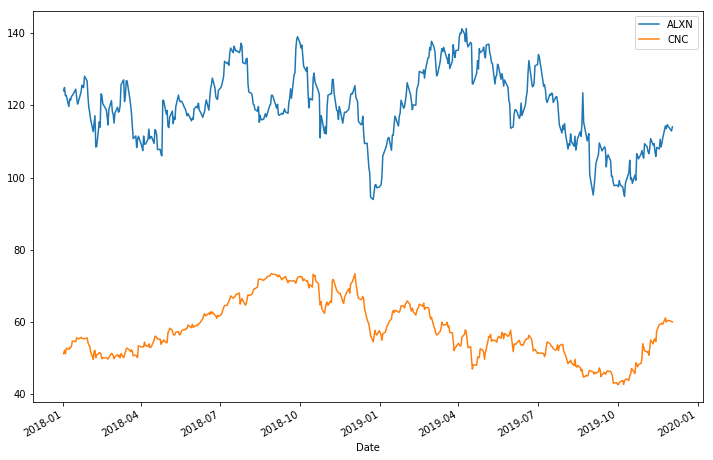

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

In [9]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

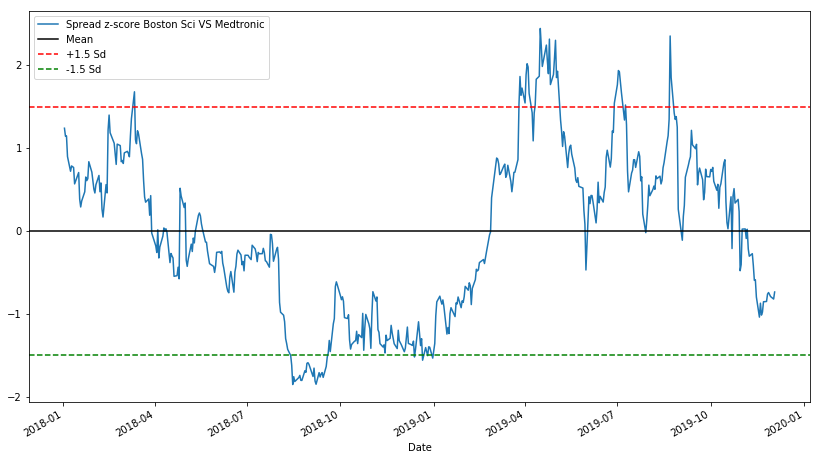

In [10]:
zscore(spread_ratio).plot(figsize=(14,8))
plt.axhline(zscore(spread_ratio).mean(), color='black')
plt.axhline(1.5, c='r', ls='--')
plt.axhline(-1.5, c='g', ls='--')
plt.legend(['Spread z-score Boston Sci VS Medtronic', 'Mean', '+1.5 Sd', '-1.5 Sd']);

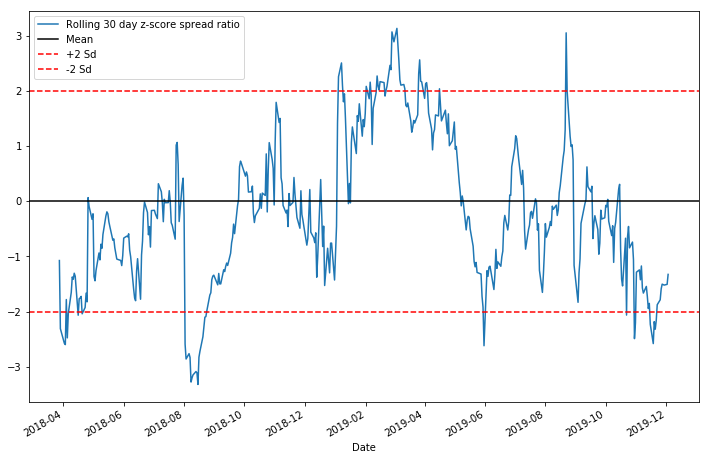

In [11]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(60).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.00, color='red', linestyle='--')
plt.axhline(-2.00, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2 Sd', '-2 Sd']);

In [12]:
from statsmodels.tsa.stattools import coint

In [13]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [14]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [15]:
print('----------Co-Integration Test-------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------Co-Integration Test-------------------
T-stat for the pair ALXN VS CNC: -3.158141484176111
Alpha value for the T-stat:  0.07721131641141586
--------------------------------------
T-stat 99%:  -3.9192584556494308
T-stat 95%:  -3.3488095575445045
T-stat 90%:  -3.0532426117390874


In [16]:
statsmodels.tsa.stattools.adfuller(spread_ratio, maxlag= 1, regression='c', autolag='t-stat', store=False, regresults=False)

(-2.470366589334209,
 0.12285192489605645,
 0,
 483,
 {'1%': -3.4439615820186846,
  '5%': -2.8675425624806605,
  '10%': -2.5699671340268937},
 2.4475089704323403)

In [17]:
# ADF check
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_check(spread_ratio)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.470366589334209
p-value : 0.12285192489605645
#Lags Used : 0
Number of Observations Used : 483
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.39810859],
       [0.39810859, 1.        ]])

In [19]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[105.92106432,  32.68927368],
       [ 32.68927368,  63.65391434]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [20]:
zscore_30_1_ratio[-20:]

Date
2019-11-05   -1.423447
2019-11-06   -1.173360
2019-11-07   -1.572536
2019-11-08   -1.664848
2019-11-11   -1.544187
2019-11-12   -1.724908
2019-11-13   -1.944882
2019-11-14   -1.851807
2019-11-15   -2.232731
2019-11-18   -2.580786
2019-11-19   -2.182146
2019-11-20   -2.319897
2019-11-21   -2.162495
2019-11-22   -1.876109
2019-11-25   -1.786822
2019-11-26   -1.588328
2019-11-27   -1.502769
2019-11-29   -1.520013
2019-12-02   -1.506534
2019-12-03   -1.325990
Name: Adj Close, dtype: float64

In [21]:
spread_ratio[-20:]

Date
2019-11-05    2.068480
2019-11-06    2.097777
2019-11-07    2.035223
2019-11-08    2.012169
2019-11-11    2.020200
2019-11-12    1.982609
2019-11-13    1.935501
2019-11-14    1.937603
2019-11-15    1.882731
2019-11-18    1.818902
2019-11-19    1.863108
2019-11-20    1.825261
2019-11-21    1.834981
2019-11-22    1.867620
2019-11-25    1.868563
2019-11-26    1.892036
2019-11-27    1.896923
2019-11-29    1.884240
2019-12-02    1.876205
2019-12-03    1.898618
Name: Adj Close, dtype: float64

In [22]:
#differenced spread
t_series_lag_1 = spread_ratio.diff(1)

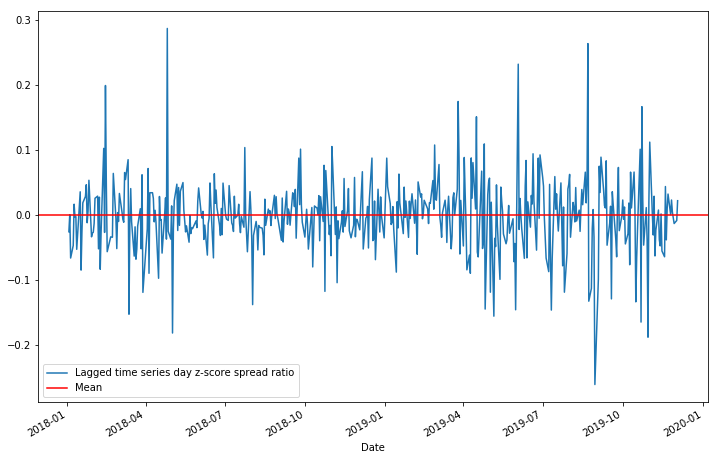

In [23]:
t_series_lag_1.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score')
plt.axhline(0, color='red')
#plt.axhline(2.0, color='red', linestyle='--')
#plt.axhline(3.0, color='red', linestyle='-')
#plt.axhline(-3.0, color='red', linestyle='-')
#plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

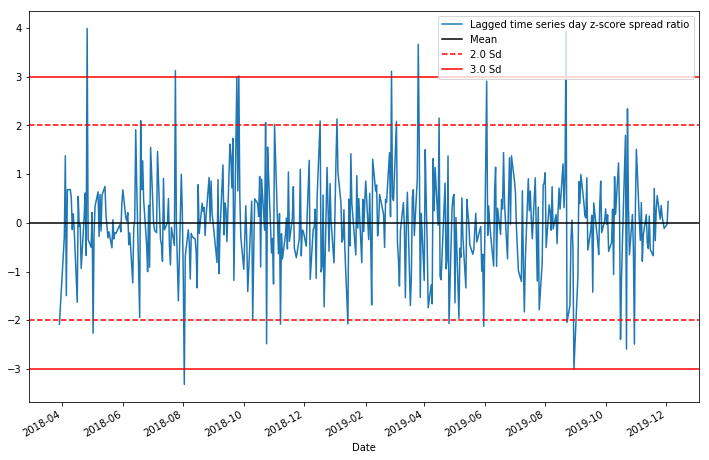

In [24]:
#1 day moving average of the price spread
spreadratio_t_series_lag_mavg_1 = t_series_lag_1.rolling(1).mean()

# Timeseries with one lag
spreadratio_t_series_lag_mavg_30 = t_series_lag_1.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_dev_ratio = t_series_lag_1.rolling(30).std()

# Compute the z score for each day
zscore_t_series_lag = (spreadratio_t_series_lag_mavg_1 - spreadratio_t_series_lag_mavg_30)/std_dev_ratio



zscore_t_series_lag.plot(figsize=(12,8),label='Timeseries Lagged 1 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(3.0, color='red', linestyle='-')
plt.axhline(-3.0, color='red', linestyle='-')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Lagged time series day z-score spread ratio', 'Mean', '2.0 Sd', '3.0 Sd']);

In [25]:
zscore_t_series_lag[-20:]

Date
2019-11-05   -0.357633
2019-11-06    0.418659
2019-11-07   -0.785937
2019-11-08   -0.245165
2019-11-11    0.171207
2019-11-12   -0.414212
2019-11-13   -0.524370
2019-11-14    0.140928
2019-11-15   -0.545028
2019-11-18   -0.674213
2019-11-19    0.710295
2019-11-20   -0.363632
2019-11-21    0.269933
2019-11-22    0.560929
2019-11-25    0.079538
2019-11-26    0.358572
2019-11-27    0.127417
2019-11-29   -0.113752
2019-12-02   -0.023044
2019-12-03    0.439792
Name: Adj Close, dtype: float64

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
t_series_dropna = t_series_lag_1.dropna()

In [28]:
result = adfuller(t_series_dropna)
result

(-23.031472917904043,
 0.0,
 0,
 482,
 {'1%': -3.4439899743408136,
  '5%': -2.8675550551408353,
  '10%': -2.569973792117904},
 -1338.7052077474982)

In [29]:
# ADF check
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [30]:
adf_check(t_series_dropna)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -23.031472917904043
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 482
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

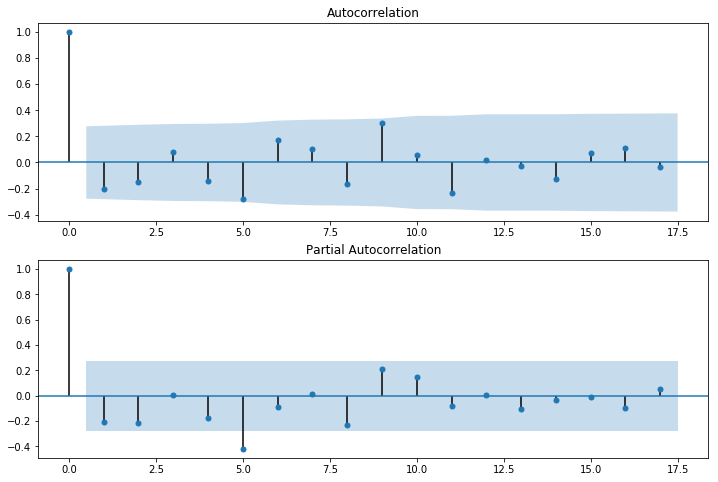

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(t_series_dropna.iloc[-50:],  ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(t_series_dropna.iloc[-50:], ax=ax2)

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model = statsmodels.tsa.arima_model.ARIMA(t_series_dropna, order=(1,0,1))
results = model.fit()
print(results.summary())

C:\Users\samar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  483
Model:                     ARMA(1, 1)   Log Likelihood                 705.643
Method:                       css-mle   S.D. of innovations              0.056
Date:                Wed, 04 Dec 2019   AIC                          -1403.287
Time:                        09:27:35   BIC                          -1386.567
Sample:                             0   HQIC                         -1396.716
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0010      0.002     -0.547      0.585      -0.005       0.003
ar.L1.Adj Close     0.7941      0.157      5.042      0.000       0.485       1.103
ma.L1.Adj Close    -0.8502      

# Estimating GARCH

In [35]:
from arch import arch_model